In [1]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing data

df = pd.read_csv('insurance_claims.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
# we can see some missing values denoted by '?' so lets replace missing values with np.nan

df.replace('?', np.nan, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
# missing values

df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

In [8]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

In [9]:
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [10]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

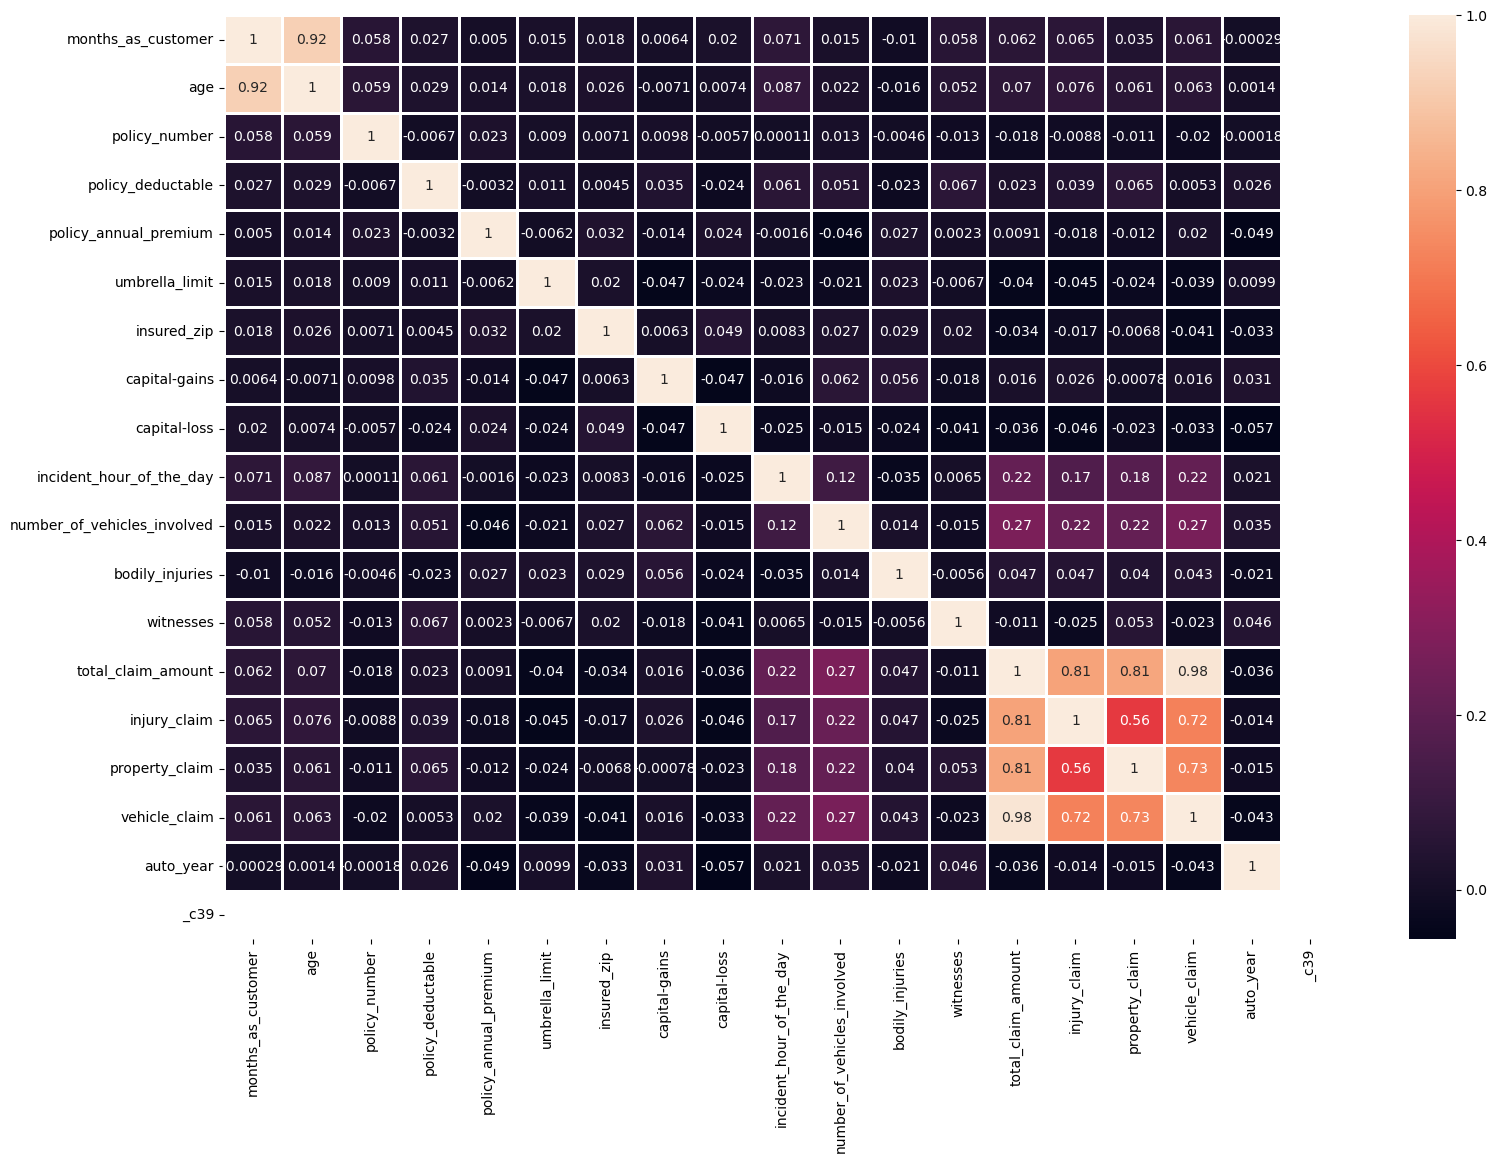

In [11]:
plt.figure(figsize = (18, 12))
sns.heatmap(data = df.corr(), annot = True, fmt = '.2g', linewidth = 1)

In [12]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [13]:
df.drop(columns= ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
        'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39'], inplace = True, axis = 1)

In [14]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [15]:
#Separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

In [16]:
#Categorical columns

cat_df = X.select_dtypes(include=['object'])

In [17]:
#Checking the number of unique values in categorical columns

for x in cat_df:
    print(f'{x}: {cat_df[x].nunique()}')

policy_csl: 3
insured_sex: 2
insured_education_level: 7
insured_occupation: 14
insured_relationship: 6
incident_type: 4
collision_type: 3
incident_severity: 4
authorities_contacted: 5
property_damage: 2
police_report_available: 2


In [18]:
#Encoding categorical columns

cat_df = pd.get_dummies(cat_df)

In [19]:
cat_df.head(1)

,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,...,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1


In [20]:
num_df =X[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [21]:
#Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_num_df = scaler.fit_transform(num_df)
scaled_num_df = pd.DataFrame(scaled_num_df, columns = num_df.columns, index = X.index)

In [22]:
X = pd.concat([scaled_num_df, cat_df], axis = 1)

In [23]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES
0,1.078140,-0.222383,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,-0.189283,...,0,0,0,0,0,1,0,1,0,1
1,0.208995,1.412784,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.363822,...,0,0,0,0,0,1,1,0,1,0
2,-0.608002,1.412784,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,0.054644,...,0,0,0,0,0,1,1,0,1,0
3,0.452355,1.412784,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,-0.224130,...,0,0,0,0,0,1,1,0,1,0
4,0.208995,-0.222383,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.257232,...,0,0,0,1,0,0,1,0,1,0


In [24]:
#!pip install imblearn
from imblearn.over_sampling import RandomOverSampler
ROS=RandomOverSampler(sampling_strategy='minority')
X_balanced,y_balanced= ROS.fit_resample(X,y)

In [25]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size = 0.25, random_state = 4)

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y1_pred = lr.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y1_pred))
print(confusion_matrix(y_test, y1_pred))
print(classification_report(y_test, y1_pred))

0.7639257294429708
[[159  33]
 [ 56 129]]
              precision    recall  f1-score   support

           N       0.74      0.83      0.78       192
           Y       0.80      0.70      0.74       185

    accuracy                           0.76       377
   macro avg       0.77      0.76      0.76       377
weighted avg       0.77      0.76      0.76       377



In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y2_pred = knn.predict(X_test)

In [29]:
print(accuracy_score(y_test, y2_pred))
print(confusion_matrix(y_test, y2_pred))
print(classification_report(y_test, y2_pred))

0.8408488063660478
[[138  54]
 [  6 179]]
              precision    recall  f1-score   support

           N       0.96      0.72      0.82       192
           Y       0.77      0.97      0.86       185

    accuracy                           0.84       377
   macro avg       0.86      0.84      0.84       377
weighted avg       0.87      0.84      0.84       377



In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y3_pred = dtc.predict(X_test)

In [31]:
print(accuracy_score(y_test, y3_pred))
print(confusion_matrix(y_test, y3_pred))
print(classification_report(y_test, y3_pred))

0.8567639257294429
[[149  43]
 [ 11 174]]
              precision    recall  f1-score   support

           N       0.93      0.78      0.85       192
           Y       0.80      0.94      0.87       185

    accuracy                           0.86       377
   macro avg       0.87      0.86      0.86       377
weighted avg       0.87      0.86      0.86       377



In [32]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy','log_loss'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}
grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [33]:
dtc = grid_search.best_estimator_
y4_pred = dtc.predict(X_test)

In [34]:
print(accuracy_score(y_test, y4_pred))
print(confusion_matrix(y_test, y4_pred))
print(classification_report(y_test, y4_pred))

0.8488063660477454
[[158  34]
 [ 23 162]]
              precision    recall  f1-score   support

           N       0.87      0.82      0.85       192
           Y       0.83      0.88      0.85       185

    accuracy                           0.85       377
   macro avg       0.85      0.85      0.85       377
weighted avg       0.85      0.85      0.85       377



In [35]:
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)
y5_pred = rand_clf.predict(X_test)

In [36]:
print(accuracy_score(y_test, y5_pred))
print(confusion_matrix(y_test, y5_pred))
print(classification_report(y_test, y5_pred))

0.9098143236074271
[[167  25]
 [  9 176]]
              precision    recall  f1-score   support

           N       0.95      0.87      0.91       192
           Y       0.88      0.95      0.91       185

    accuracy                           0.91       377
   macro avg       0.91      0.91      0.91       377
weighted avg       0.91      0.91      0.91       377



In [37]:
grid_params = {
    'criterion' : ['gini', 'entropy','log_loss'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}
grid_search1 = GridSearchCV(rand_clf, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search1.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy', max_depth=10,
                                              max_features='sqrt',
                                              min_samples_split=3,
                                              n_estimators=140),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [38]:
rand_clf1 = grid_search1.best_estimator_
y6_pred = rand_clf1.predict(X_test)

In [39]:
print(accuracy_score(y_test, y6_pred))
print(confusion_matrix(y_test, y6_pred))
print(classification_report(y_test, y6_pred))

0.8938992042440318
[[167  25]
 [ 15 170]]
              precision    recall  f1-score   support

           N       0.92      0.87      0.89       192
           Y       0.87      0.92      0.89       185

    accuracy                           0.89       377
   macro avg       0.89      0.89      0.89       377
weighted avg       0.90      0.89      0.89       377



In [40]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y7_pred = gnb.predict(X_test)

In [41]:
print(accuracy_score(y_test, y7_pred))
print(confusion_matrix(y_test, y7_pred))
print(classification_report(y_test, y7_pred))

0.6710875331564987
[[ 98  94]
 [ 30 155]]
              precision    recall  f1-score   support

           N       0.77      0.51      0.61       192
           Y       0.62      0.84      0.71       185

    accuracy                           0.67       377
   macro avg       0.69      0.67      0.66       377
weighted avg       0.70      0.67      0.66       377



In [42]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y8_pred = etc.predict(X_test)

In [43]:
print(accuracy_score(y_test, y8_pred))
print(confusion_matrix(y_test, y8_pred))
print(classification_report(y_test, y8_pred))

0.6710875331564987
[[ 98  94]
 [ 30 155]]
              precision    recall  f1-score   support

           N       0.77      0.51      0.61       192
           Y       0.62      0.84      0.71       185

    accuracy                           0.67       377
   macro avg       0.69      0.67      0.66       377
weighted avg       0.70      0.67      0.66       377

